## Random Numbers and Pseudo-Random Number Generation (Chapter 04)

- Computers are _deterministic_ machines, meaning that, for a given input, they always produce an identical output. 
- _Deterministic_ means we can _predict_ what a computer will do, given the input set and the implementation of an algorithm.
- However "random" implies *non-determinism!*
- So, how can we achieve _randomness_ using computers/programming using a machine that operates deterministically?
- We can repeat sequences exactly if we _seed_ the pseudo-random number generator with an identical value as before

---

In [82]:
# Code needed to load different types of images (DO NOT DELETE)
#
from IPython.display import display, Image, SVG, Math, YouTubeVideo

---

In [2]:
import random

#help( random )

values = list( range( 1, 16 ) )

print( f"--- Original values: {values}" )

random.shuffle( values )

print( "--- Shuffled values: {}, minimum={}".format( values, min( values ) ) )

--- Original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
--- Shuffled values: [8, 13, 6, 14, 10, 15, 3, 4, 1, 12, 11, 5, 7, 2, 9], minimum=1


In [4]:
random.shuffle( values )

print( "--- Shuffled values: {}, minimum={}".format( values, min( values ) ) )

--- Shuffled values: [10, 9, 8, 15, 11, 7, 4, 12, 1, 14, 2, 5, 13, 3, 6], minimum=1


In [5]:
random.shuffle( values )

print( "--- Shuffled values: {}, minimum={}".format( values, min( values ) ) )

--- Shuffled values: [13, 1, 8, 12, 10, 3, 9, 14, 5, 15, 4, 6, 2, 11, 7], minimum=1


In [6]:
neu_str = "Near East University"
neu_lst = list( neu_str )
neu_lst

['N',
 'e',
 'a',
 'r',
 ' ',
 'E',
 'a',
 's',
 't',
 ' ',
 'U',
 'n',
 'i',
 'v',
 'e',
 'r',
 's',
 'i',
 't',
 'y']

In [7]:
# Shuffle once
#
random.shuffle( neu_lst )

"".join( neu_lst )

'ntUaevE iayrtr sieNs'

In [8]:
# Shuffle one more time
#
random.shuffle( neu_lst )

"".join( neu_lst )

's irUtyiaNr tneaeEvs'

---

Suppose we have letters `a`, `b`, `c`, and `d` in a collection, and we want to 

- pick letter `a` 40% of the time, 
- pick letter `b` 30% of the time, 
- pick letter `c` 20% of the time, and finally 
- pick letter `d` 10% of the time. 

What we can do is to place blocks with 4 `a`s, 3 `b`s, 2 `c`s, and 1 `d` in a bag, and we can have someone blindly pick one of the blocks, then place the block back into the bag and repeat inifinitely. 

We can actually multiply these values with any constant, `c`, where `c > 1`, and the result would have been the same.

We can achieve this using NumPy's `choice()` function.

In [9]:
import numpy as np

#help( np.random.choice )

letters = ['a', 'b', 'c', 'd']

# Set percentages. The sum must add up to 1.00 exactly!
#
a_pct = 0.40 # 40%
b_pct = 0.30 # 30%
c_pct = 0.20 # 20%
d_pct = 0.10 # 10%

# A single example
#
np.random.choice( letters, p=[a_pct, b_pct, c_pct, d_pct] )

'c'

In [10]:
a_count = b_count = c_count = d_count = 0
n_iterations = 100000

for _ in range( n_iterations ):
    #
    rand_letter = np.random.choice( letters, p=[a_pct, b_pct, c_pct, d_pct] )
    
    if   rand_letter == 'a': a_count += 1
    elif rand_letter == 'b': b_count += 1 
    elif rand_letter == 'c': c_count += 1 
    elif rand_letter == 'd': d_count += 1
        
    ##print( "{} ".format( rand_letter ), end="" )
    
print( "\n\n--- Letter counts and percentages:" )
print( "\ta: {:10d} ({:>4.1f}%)".format( a_count, a_count * 100 / n_iterations ) )
print( "\tb: {:10d} ({:>4.1f}%)".format( b_count, b_count * 100 / n_iterations ) )
print( "\tc: {:10d} ({:>4.1f}%)".format( c_count, c_count * 100 / n_iterations ) )
print( "\td: {:10d} ({:>4.1f}%)".format( d_count, d_count * 100 / n_iterations ) )



--- Letter counts and percentages:
	a:      40001 (40.0%)
	b:      30180 (30.2%)
	c:      20008 (20.0%)
	d:       9811 ( 9.8%)


---

If we increase the number of iterations, what do you notice?

The higher the number of iterations, the closer we seem to get to the expected percentages/probabilities.

---

We can do the same using the `random.choices()` API.

In [16]:
import random

a_count = b_count = c_count = d_count = 0
n_iterations = 1000000 # NOTE THAT WE ARE RUNNING 50,000 TRIALS THIS TIME, NOT 1000!
k = 1 # Need a single choice

for _ in range( n_iterations ):
    #
    rand_letter = random.choices( letters, weights=[a_pct, b_pct, c_pct, d_pct], k=k )[0]
    
    if   rand_letter == 'a': a_count += 1
    elif rand_letter == 'b': b_count += 1 
    elif rand_letter == 'c': c_count += 1 
    elif rand_letter == 'd': d_count += 1
        
    #print( "{} ".format( rand_letter ), end="" )
    
print( "\n\n--- Letter counts and percentages:" )
print( "\ta: {:10d} ({:>5.2f}%)".format( a_count, a_count * 100 / n_iterations ) )
print( "\tb: {:10d} ({:>5.2f}%)".format( b_count, b_count * 100 / n_iterations ) )
print( "\tc: {:10d} ({:>5.2f}%)".format( c_count, c_count * 100 / n_iterations ) )
print( "\td: {:10d} ({:>5.2f}%)".format( d_count, d_count * 100 / n_iterations ) )



--- Letter counts and percentages:
	a:     399799 (39.98%)
	b:     299437 (29.94%)
	c:     200983 (20.10%)
	d:      99781 ( 9.98%)


---

In [17]:
letters

['a', 'b', 'c', 'd']

In [18]:
# Choose 3 letters randomly instead of 1 as in the case above.
#
random.choices( letters, weights=[a_pct, b_pct, c_pct, d_pct], k=3 )

['b', 'd', 'c']

In [19]:
# Choose 3 letters randomly instead of 1 as in the case above.
#
random.choices( letters, weights=[a_pct, b_pct, c_pct, d_pct], k=3 )

['a', 'c', 'a']

In [20]:
# Choose 3 letters randomly instead of 1 as in the case above.
#
random.choices( letters, weights=[a_pct, b_pct, c_pct, d_pct], k=3 )

['a', 'a', 'a']

---

In [21]:
np.random.choice( range( 5 ), 3 )

array([4, 1, 2])

In [22]:
np.random.choice( range( 5 ), 3 )

array([4, 2, 1])

In [23]:
for _ in range( 100 ):
    #
    value = np.random.choice( range( 5 ), 1, p=[0.1, 0, 0.3, 0.6, 0])
    print( value, end="" )

[2][3][3][3][2][3][0][3][3][3][3][0][3][3][3][3][3][3][3][2][3][2][2][3][2][3][3][2][3][0][0][3][2][3][3][3][3][2][0][3][2][3][3][0][3][2][2][2][2][2][3][2][3][3][3][2][3][2][3][3][2][0][2][3][3][3][3][3][3][2][2][3][3][3][0][3][3][3][3][3][3][3][3][3][2][3][2][3][3][2][3][3][0][2][2][3][2][2][2][2]

Since the probabilities of values `1` and `4` were set to zero, we should never get these values!

In [25]:
for _ in range( 100 ):
    #
    value = np.random.choice( range( 5 ), 2, p=[0.1, 0.1, 0.3, 0.6, 0.4])
    print( value, end="" )

ValueError: probabilities do not sum to 1

**This is _INPUT VALIDATION_ in action!**

In [26]:
for _ in range( 100 ):
    #
    value = np.random.choice( range( 5 ), 2, p=[0.1, 0.1, 0.3, 0.2, 0.3])
    print( value, end=" " )

[4 2] [3 2] [3 1] [4 4] [2 0] [4 2] [2 0] [2 2] [4 2] [3 3] [2 0] [2 3] [2 3] [4 2] [2 3] [4 4] [3 4] [4 0] [2 2] [3 4] [2 2] [0 1] [4 1] [2 0] [3 4] [2 0] [3 3] [4 3] [4 0] [0 4] [3 3] [4 3] [2 4] [3 2] [3 1] [4 3] [3 4] [2 4] [2 2] [2 2] [4 2] [1 4] [3 0] [3 3] [2 4] [2 2] [2 4] [2 4] [2 4] [0 4] [0 0] [3 4] [0 4] [2 3] [2 3] [3 4] [4 2] [4 2] [2 0] [1 4] [2 2] [3 2] [3 4] [2 3] [4 4] [4 2] [3 4] [2 3] [4 2] [2 2] [0 2] [4 4] [4 2] [2 3] [4 2] [2 2] [2 3] [3 4] [4 4] [1 4] [2 4] [4 3] [3 1] [1 3] [3 4] [0 2] [1 4] [4 4] [2 2] [2 1] [2 2] [3 3] [1 1] [4 4] [4 3] [0 3] [2 0] [3 4] [3 2] [3 4] 

In [27]:
for _ in range( 100 ):
    #
    value = np.random.choice( range( 5 ), 3, p=[0.1, 0.6, 0.1, 0.1, 0.1])
    print( value, end="" )

[1 1 2][3 1 1][1 3 4][1 1 1][2 1 1][1 1 0][1 4 1][1 1 1][1 1 1][2 3 4][1 1 1][1 1 3][1 4 1][2 1 1][1 1 3][4 1 1][4 1 2][2 4 0][4 1 2][3 3 1][2 1 1][2 1 1][1 1 1][1 1 4][4 1 1][1 1 0][1 3 1][1 1 4][3 1 1][1 3 2][1 1 4][1 1 1][1 1 1][1 2 1][1 1 4][3 2 1][0 1 1][1 1 1][1 1 1][4 0 0][1 4 3][2 1 4][4 0 3][1 3 2][0 2 1][2 1 0][1 1 4][1 3 2][1 1 3][4 1 4][4 4 1][1 1 4][1 0 1][1 1 4][0 1 3][2 4 4][0 1 0][1 2 1][3 2 2][0 1 1][4 4 0][3 1 1][1 1 0][4 1 1][1 4 1][1 1 3][1 1 0][0 1 3][0 4 1][2 1 3][1 1 1][1 2 1][4 0 1][3 1 1][1 1 4][1 1 1][2 1 3][2 3 3][1 2 1][4 1 4][1 1 4][4 2 1][3 1 1][1 2 3][1 1 1][1 1 1][3 2 4][4 1 1][1 0 1][1 1 1][1 0 1][1 1 2][0 1 1][1 3 1][3 1 1][4 1 3][1 2 1][1 1 0][1 4 1][3 2 4]

In [68]:
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [29]:
k = 3 # To choose 3 random values

for _ in range( 10 ):
    #
    rvalue = random.sample( letters, k ) 
    print( rvalue )

['a', 'd', 'c']
['c', 'a', 'd']
['d', 'c', 'a']
['d', 'c', 'a']
['c', 'd', 'b']
['a', 'c', 'b']
['c', 'a', 'b']
['b', 'a', 'c']
['c', 'd', 'a']
['b', 'd', 'a']


### 4.9 __Application: Random Numbers and Simulations__

Generate random floating-point values in the range `[0.0, 1.0)`.

Note the `[ ... )` specification!

In [3]:
import random

for _ in range( 10 ):
    #
    rval = random.random()
    print( "{:.10f} ".format( rval ), end="\n" )

0.6707869358 
0.4569691158 
0.5721001527 
0.3898259303 
0.3772314502 
0.8316901423 
0.3852930227 
0.2498382688 
0.4897228795 
0.3756111886 


We can also generate random integers.

In [32]:
help( random.randint )

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [6]:
a, b = 3, 12
N = 45

for _ in range( N ):
    #
    rvalue = random.randint( a, b ) 
    print( "{} ".format( rvalue ), end="" )

8 11 3 11 10 3 4 8 12 12 10 4 6 11 10 3 6 9 7 3 12 3 5 12 3 11 7 9 10 9 12 4 6 11 4 4 4 5 12 12 3 4 11 12 4 

In [14]:
from collections import defaultdict

a, b = 0, 9
#N = 10
N = 10000000
num_table = defaultdict( int )

for _ in range( N ):
    #
    rvalue = random.randint( a, b ) 
    num_table[rvalue] += 1
    #print( "{} ".format( rvalue ), end="" )
    
num_table

defaultdict(int,
            {4: 1000713,
             1: 1000702,
             9: 999217,
             5: 999627,
             0: 1000068,
             3: 1000599,
             2: 1000750,
             8: 998921,
             6: 999031,
             7: 1000372})

When you look at these *frequency* values, what do you observe?

Let us compute the percentages of these *frequency* values.

In [19]:
{r_num: f"{freq * 100 / N:.3f}%" for r_num, freq in num_table.items()}

{4: '10.007%',
 1: '10.007%',
 9: '9.992%',
 5: '9.996%',
 0: '10.001%',
 3: '10.006%',
 2: '10.008%',
 8: '9.989%',
 6: '9.990%',
 7: '10.004%'}

The pseudo-random number generator generates values with equal probability. This means that the random numbers generated are *uniformly distributed*. That is, each pseudo-random number has equal chance of occurrence.

#### 4.9.2 __Simulating Die Tosses__

In [22]:
a, b = 1, 6
N = 10

for trial_no in range( N ):
    #
    die_1 = random.randint( a, b )
    die_2 = random.randint( a, b )
    
    print( "--- Trial #{:02d}> Die_1: {}, Die_2: {}".format( trial_no + 1, die_1, die_2 ) )

--- Trial #01> Die_1: 6, Die_2: 1
--- Trial #02> Die_1: 6, Die_2: 3
--- Trial #03> Die_1: 4, Die_2: 6
--- Trial #04> Die_1: 2, Die_2: 5
--- Trial #05> Die_1: 2, Die_2: 5
--- Trial #06> Die_1: 3, Die_2: 5
--- Trial #07> Die_1: 6, Die_2: 1
--- Trial #08> Die_1: 2, Die_2: 3
--- Trial #09> Die_1: 1, Die_2: 1
--- Trial #10> Die_1: 1, Die_2: 3


#### 4.9.3 __The Monte Carlo Method__

The Monte Carlo method is an ingenious method for finding approximate solutions to problems that cannot be precisely solved. 

> __Example:__ Computation of the value of $\pi$ using _simulation_

Remember that $\pi$ is the ratio of the *circumference* of a circle to the *diameter* of that circle.

Simulate shooting a dart into a (blue) square surrounding a (pink) circle of radius 1. 

This is easy to do.

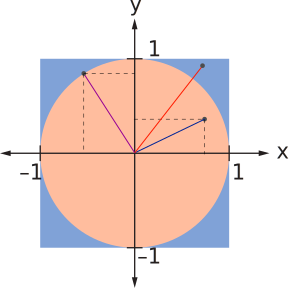

In [83]:
SVG( "images/monte-carlo-simulation.svg" )

- Generate random x- and y-coordinates between –1 and 1. 
- If the generated point lies inside the (pink) circle, we will count it as a _hit_. 
  That is the case when $x^2 + y^2 \le 1$. 

Since our shots are entirely random, we expect that the ratio of hits / tries is approximately equal to the ratio of the areas of the circle and the square.

What is the area of the circle?

Using our knowledge of geometry, we know that the area of a circle is given by $\pi \cdot r^2$, where $r$ is the _radius_ of the circle.

Since our $r=1$, the area of our circle will just be $\pi$!

The area of the blue square is $2r \times 2r = 4 \cdot r^2$. Since $r=1$, the area is 4!

Therefore, the ratio of the area of the pink circle to the area of the blue square is $\dfrac{\pi \cdot r^2}{4 \cdot r^2} = \dfrac{\pi}{4}$.

So the ratio of hits in the (pink) circle to the total number of tries should be proportional to the _area of the square_. So, we estimate that $\mathtt{hits} / \mathtt{tries}$ should be a good approximation of $\pi / 4$., since the area of the square is 4.

__QUESTION:__ How can we generate values in the range `[-1.0, 1.0]` using the `random` module?

- Observation: `random.random()` gives us values in the range `[0.0, 1.0)`. 
- Note that `)` means the end value is __not__ included in the range!

So, instead of solving the seemingly difficult problem of generating values in the `[-1.0, 1.0]` range, let us solve an _easier_ version of the problem:
    
- Generate random floating-point values in the range `[2.0, 3.0)`. Note that the difference in the range is still 1.0, as in the range of values returned by `random.random()`.
- The solution is rather easy: We offset the values we get from `random.random()` by 2.0!
    So we can transform the range `[0.0, 1.0)` to  `[2.0, 3.0)`. 

In [23]:
for _ in range( 20 ):
    #
    randval_0_to_1 = random.random()
    randval_2_to_3 = 2.0 + randval_0_to_1
    #print( "{:.2f}".format( randval_2_to_3 ), end=" " )
    print( "{}".format( randval_2_to_3 ), end=" " )

2.6953127317702053 2.400465807020434 2.167587986083901 2.355722847774245 2.5920717864533995 2.6007923445058005 2.969322814242724 2.3314579474812547 2.0761627301076353 2.549850156613136 2.49229663292327 2.0403234646185684 2.798341467718067 2.266630960882777 2.100425068076886 2.210659014560167 2.271445048601102 2.6878321404266643 2.62406364581181 2.6736185415348546 

- Observation: If we wish to get values in the range `[a, b]` where `|b - a| > 1.0`, then we will have to somehow extend the difference within the range of values beyond 1.0.

However, this general observation begs the following question as well!

__QUESTION:__ How can we generate values in the range `[0.0, 0.5)` using the `random` module?

The answer should be simple, right?

Just divide each value by 2! Since the highest value is almost 1.0, then dividing this largest possible value should get us values less than 0.5 always.

In [25]:
for _ in range( 20 ):
    #
    rval = random.random() / 2.0
    #print( "{:.2f}".format( rval ), end=" " )
    print( "{}".format( rval ), end=" " )

0.1947752285171519 0.19702600812561438 0.4884990684394335 0.07630505987806169 0.403710366138756 0.1270127808520502 0.2364619098334615 0.145434275360041 0.08290522618378565 0.06259045115861084 0.04544888299748656 0.48455148328652825 0.1444344058665647 0.38496211272629927 0.22057013950001436 0.26304155500964854 0.005764995317091626 0.2926087655095643 0.20244839442797835 0.28928806800294726 

Well, we have to answer yet another question though before we return to the original question above.

__QUESTION:__ How can we generate random values in the range `[0.25, 0.75)`?

This problem is actually identical to our original question! 

Isn't this the same problem as `0.25 + Generate random value in the range [0.0, 0.50)`?

What if we 

- multiply these range endpoints by a 100 to get `[25, 75]` (*inclusive*, this time!),
- generate random integers in this range&mdash;`random.randint()` can do this for us, and
- divide each random value by 100 to get back to the original range.

In [62]:
help( random.randint )

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [26]:
a, b = 25, 75

for _ in range( 100 ):
    #
    rval = random.randint( a, b )
    print( "{}".format( rval ), end=" " )

69 72 74 46 60 54 34 73 67 63 75 66 61 35 71 44 68 71 41 64 57 57 47 59 49 54 48 60 53 52 31 60 31 41 55 56 70 51 35 31 61 51 43 31 45 44 54 25 59 65 59 44 54 54 32 25 25 58 29 44 67 67 51 37 70 38 70 47 44 67 60 27 46 42 51 55 60 28 25 60 72 55 33 69 45 32 35 37 39 59 45 31 51 56 66 59 45 70 57 53 

In [27]:
a, b = 0.25, 0.75 # [0.25, 0.75] INCLUSIVE!

for _ in range( 100 ):
    #
    rval = random.randint( int( 100 * a ), int( 100 * b ) ) / 100.0
    #print( "{:.2f}".format( rval ), end=" " )
    print( f"{rval:0.2f}", end=" " )

0.25 0.68 0.49 0.32 0.52 0.28 0.41 0.61 0.67 0.67 0.27 0.29 0.56 0.47 0.61 0.63 0.50 0.48 0.34 0.26 0.61 0.56 0.57 0.52 0.59 0.60 0.28 0.39 0.75 0.48 0.35 0.62 0.54 0.45 0.46 0.74 0.71 0.41 0.47 0.59 0.41 0.54 0.32 0.40 0.33 0.57 0.41 0.72 0.65 0.68 0.29 0.47 0.42 0.48 0.51 0.26 0.40 0.48 0.58 0.28 0.43 0.44 0.47 0.49 0.55 0.28 0.62 0.43 0.58 0.75 0.56 0.67 0.56 0.66 0.65 0.73 0.69 0.53 0.48 0.45 0.43 0.39 0.75 0.42 0.67 0.66 0.70 0.29 0.62 0.47 0.26 0.52 0.47 0.75 0.73 0.36 0.44 0.45 0.41 0.39 

Can we specify negative values in `random.randint()`? Sure!

In [28]:
a, b = -5, 5

for _ in range( 100 ):
    #
    rval = random.randint( a, b )
    print( "{}".format( rval ), end=" " )

4 3 4 2 -5 3 -2 -4 -2 5 -5 -5 4 2 1 3 -2 0 2 -3 5 4 -1 -3 4 2 1 -1 -3 1 0 4 0 -3 1 1 2 -1 3 4 -1 5 -2 5 3 -2 0 5 5 0 -3 -4 -1 0 3 2 5 -1 0 2 4 -3 1 -1 0 1 1 1 -2 -5 0 -1 3 -5 -4 4 -1 4 1 1 1 1 -2 5 -1 -1 1 4 -2 -1 3 4 -2 3 3 2 2 5 1 5 

So, we can 

- generate random integers, say, in the range `[-1000, 1000]`,
- divide each value by 1000 to get floating-point values in the range `[-1.0, 1.0]` *inclusive*!

In [29]:
a, b = -1000, 1000

for _ in range( 15 ):
    #
    rval = random.randint( a, b ) / 1000.0
    #print( "{:.3f}".format( rval ), end=" " )
    print( "{}".format( rval ), end=" " )

0.459 0.271 -0.886 -0.133 0.914 -0.178 0.822 0.944 0.684 -0.942 -0.532 -0.542 0.551 -0.049 -0.352 

However, the problem here is that the we can only get floating-point values with 3-decimal digit precision. This may just suffice for our original exercise of estimating the value of $\pi$. If we demand more precision, then we can increase the integer range to any higher value, say, 10000 or 99999!

Regardless, though, let us go back to the original problem and ask a similiar question of how we can generate random floating-point values in the range `[0.0, 5.0)` using  `random.random()`.

Since `random.random()` generates values in the range `[0.0, 1.0)`, then we will have to multiply every element we get with 5.0!

In [30]:
max_val = 5.0

for _ in range( 10 ):
    #
    rval = random.random() * max_val
    print( "{}".format( rval ), end="\n" )

1.2075666954845405
3.852525956659237
2.1866136119814614
0.045193029540981366
4.039008970725062
4.451600000982733
4.901071500729578
3.9047180589946233
1.7855028745844441
2.0663666650029495


So, how can we generate floating-point values in the range `[2.0, 6.0)`?

- The difference between the two range endpoints is `6.0 - 2.0 = 4.0`. 

- So, we will need to generate pseudo-random floating-point values in the range `[0.0, 4.0)` first.

- Then, we will add `2` to bias these values to get the correct range!

Therefore, in general, generation of random floating-point values in the range `[a, b)` using `random.random()` requires the following:

- Compute `d = b - a`
- Generate random floating-point values in the range `[0.0, 1.0)` using `random.random()`
- Multiply these random values by `d` to get values in the range `[0.0, d)`
- Add `a` to these values to get random values in the range `[a, b)`, noting that `a + d` is `b` `(a + (b - a) = b)`

```
a + (b - a) * random.random()
```

Let us consider the example of generating random floating-point values in the range `[5.0, 12.0)`.

- Compute `d`: `d = 12 - 5 = 7`
- Generate `r`: `r = random.random()`
- Multiply by `d`: `v = r * d`
- Add `a`: `t = v + a`

In [31]:
a, b = 5, 12
d = b - a
n_iterations = 10

for _ in range( n_iterations ):
    #
    rval_a_to_b = a + random.random() * d
    print( "{}".format( rval_a_to_b ), end="\n" )

8.125206956427501
7.976525244688045
11.009536887137546
11.864729976796536
5.598764240940182
8.815657324412184
7.648081815445025
7.470758709088093
9.520881375671456
6.406453401632921


Finally, we can answer our original question and move onto estimating $\pi$.

In [32]:
a, b = -1, +1
d = b - a

for _ in range( 10 ):
    #
    rval_a_to_b = a + random.random() * d
    print( "{}".format( rval_a_to_b ), end="\n" )

0.9510130837622286
-0.8972638542385298
0.598397777654176
-0.5552079410725159
0.4344953196425767
-0.2035162517572351
0.5225559236363848
0.22655658491752262
-0.5736253075954905
-0.771693210526472


When you look at the modified source code of the Monte Carlo simulation program, you will notice that the author has used the exact same formulation:

> [src/montecarlo-simulation-to-estimate-pi.py](src/montecarlo-simulation-to-estimate-pi.py)

You can check out the original code as well. The formula used is identical, albeit expressed only slightly differently.

In [33]:
!python src/montecarlo-simulation-to-estimate-pi.py

--- Our estimate for pi ......:  3.14172
--- Our estimate is off by ...:  0.0001273464102067301


In [87]:
from math import pi
pi

3.141592653589793

---

<img src="images/self-check-exercise-logo.svg.png" width="100" align="left" style="margin: 0px 10px 0px 0px;"/>

<font size="+1">__43.__</font> &nbsp;In many games, you throw a pair of dice to get a value between 2 and 12. What is 
wrong with this simulated throw of a pair of dice?

        sum = randint( 2, 12 )
    
That is, what is wrong with doing the above compared to doing the following?

    die_1 = randint( 1, 6 )
    die_2 = randint( 1, 6 )
    sum = die_1 + die_2

__ANSWER:__
    
Consider all possible dice rolls or _permutations_&mdash; We should get (4, 5) as well as (5, 4), for example.

I will be demonstrating all calculations using Python programming, but I will have to use some concepts we have not yet covered in class. So please bear with me and just concentrate on the general approach and the results we get.

In [34]:
import itertools

dice_faces = [1, 2, 3, 4, 5, 6]
all_rolls = [p for p in itertools.product( dice_faces, repeat=2 )]

# Print so that we can display the rolls in less number of lines instead of having pretty-pretting take effect.
#
print( all_rolls ) 

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [35]:
print( "--- There are {} different rolls possible!".format( len( all_rolls ) ) )

--- There are 36 different rolls possible!


That is, the _probability_ of each of these rolls is `1/36`, since there are 36 possibilities.

What are the sums for all these rolls? For example, how many times do we get a sum of `2`, and how many times do we get a sum of `12`, say?

There is only one way we can ever get a `2`, by rolling a `1-1`. So, the probability of getting a sum of `2` is `1/36`.

There is only one way we can ever get a `12`, by rolling a `6-6`. So, the probability of getting a sum of `12` is also `1/36`.

But, what about a `7`?

We get a sum of `7` whenever we throw a

- `1-6`
- `2-5`
- `3-4`
- `4-3`
- `5-2`
- `6-1`

So we have 6 instances in which we get a sum of `7`. So the probability of getting a sum of `7` is `6/36`.

Now when we compare the chances of getting a sum of `2` (`1/36`) and a sum of `7` (`6/36`), we realize that they are __not__ equal. That is, we have six times as much chance to get a `7` than a `2`.

However, if we generate random integers in the range `[2, 12]`, each of those 11 different sum values will have __equal__ chance of occurring. However, real life tells us otherwise! We only looked into the case of `2`, `12`, and `7`, but here is the entire list of probabilities:

I will be using data structures that we have not yet covered, but please bear with me. Just note the general approach and note the results for now.

In [36]:
import itertools

dice_faces = [1, 2, 3, 4, 5, 6]
all_rolls = [p for p in itertools.product( dice_faces, repeat=2 )]
all_sums = [a + b for a, b in all_rolls]

# Print so that we can display the rolls in less number of lines instead of having pretty-pretting take effect.
#
sorted_sums = sorted( all_sums )
unique_sums = sorted( set( all_sums ) )

print( sorted_sums )
print( unique_sums )

[2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [37]:
msg = "--- Sum {sum:<2d} occurs {cnt} time(s), Prob( sum={sum:<2d} ) = {cnt:2d}/36"

for cur_sum in unique_sums:
    #
    cur_count = sorted_sums.count( cur_sum )
    print( msg.format( sum=cur_sum, cnt=cur_count ) )     

--- Sum 2  occurs 1 time(s), Prob( sum=2  ) =  1/36
--- Sum 3  occurs 2 time(s), Prob( sum=3  ) =  2/36
--- Sum 4  occurs 3 time(s), Prob( sum=4  ) =  3/36
--- Sum 5  occurs 4 time(s), Prob( sum=5  ) =  4/36
--- Sum 6  occurs 5 time(s), Prob( sum=6  ) =  5/36
--- Sum 7  occurs 6 time(s), Prob( sum=7  ) =  6/36
--- Sum 8  occurs 5 time(s), Prob( sum=8  ) =  5/36
--- Sum 9  occurs 4 time(s), Prob( sum=9  ) =  4/36
--- Sum 10 occurs 3 time(s), Prob( sum=10 ) =  3/36
--- Sum 11 occurs 2 time(s), Prob( sum=11 ) =  2/36
--- Sum 12 occurs 1 time(s), Prob( sum=12 ) =  1/36


Obviously, when we sum all the probabilities, we get `36/36`, which is 1.0.

Since the probabilities of all possible sums range from `1/36` to `6/36` in discrete increments of the numerator, we cannot treat each as equally likely, as we would have&mdash;___incorrectly so___&mdash;had we resorted to using `random.randint( 2, 12 )`, in which case each sum would have the probability of `1/11`, since there are 11 possible sums, as you can see above.

So, treating each of these probabilities equally likely is wrong, since doing so does not reflect reality. Moreover, the equal probability value of `1/11` that we get from `random.randint( 2, 12 )` does not even reflect a single probability value correctly!

---

### Seeding the Pseudo-Random Number Generator

All pseudo-random number generators provide the ability to regenerate the exact same sequence of random values using a _seed_. The value of the _seed_ is entirely arbitrary. However, if we wish to have the same sequence repeat, we will have to use the same _seed_.

Let us demonstrate this first _without_ using a seed.

In [41]:
import random

for i in range( 3 ):
    #
    print( "--- Sequence {}: ".format( i + 1 ), end="" )
    
    for _ in range( 10 ):
        #
        r_val = random.randint( 2, 12 )
        print( "{:2d}".format( r_val ), end=" " )
    
    print()

--- Sequence 1: 11  9  8  8  7  7  8  8 12  5 
--- Sequence 2:  4  6  5 12  4  9  7  8  2 11 
--- Sequence 3:  3  7  6  4  8  9  2  7  5 10 


We generated three sequences of 10 pseudo-random integers, and we go different values every time.

Had we seeded the pseudo-random number generator every time we started a new sequence, all three sequences wouldh have been identical.

In [43]:
import random

seed_val = -397 # An arbitrary value!

for i in range( 3 ):
    #
    print( "--- Sequence {}: ".format( i + 1 ), end="" )
    
    random.seed( seed_val )
    
    for _ in range( 10 ):
        #
        r_val = random.randint( 2, 12 )
        print( "{:2d}".format( r_val ), end=" " )
    
    print()

--- Sequence 1:  3  3  8  9  2  6 11  4  5  8 
--- Sequence 2:  3  3  8  9  2  6 11  4  5  8 
--- Sequence 3:  3  3  8  9  2  6 11  4  5  8 


Aha! The same sequence of values every time!

What if changed the seed?

In [45]:
import random

seed_val = 8246 # Another arbitrary value!

for i in range( 3 ):
    #
    print( "--- Sequence {}: ".format( i + 1 ), end="" )
    
    random.seed( seed_val )
    
    for _ in range( 10 ):
        #
        r_val = random.randint( 2, 12 )
        print( "{:2d}".format( r_val ), end=" " )
    
    print()

--- Sequence 1:  8  4 10  5  5  9  8  4 12  9 
--- Sequence 2:  8  4 10  5  5  9  8  4 12  9 
--- Sequence 3:  8  4 10  5  5  9  8  4 12  9 


Now the sequences are different from those we obtained with the previous seed. However, they are identical among themselves.

So, in summary, if we wish to get the identical sequence, we must seed the pseudo-random number generator with the same exact seed value as before.

---